## Exercise: Discriminant Analysis and Unbalanced Datasets


In this exercise, we will use the handwritten digits data set of Scikit-learn (load_digits). Run the code below. Read the description of the data set and check a sample image. 


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

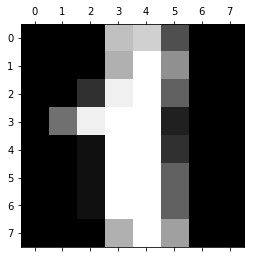

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import numpy as np


DigitsData=load_digits()
print(DigitsData.keys()) 
print(DigitsData.DESCR) #read description of the dataset
print(DigitsData.data[1])

#plot one of the images in the data
plt.gray() 
plt.matshow(DigitsData.images[1]) 
plt.show() 

#### A) Our objective is to build classfiers that identify digit 9. For this purpose, answer the following (3pts):

1) Define the target value to be equal to 1 (or True) only for digit 9, and 0 (or False) otherwise.
You can define: y= (DigitsData.target == 9)


- Find how many times y is equal to 9 and how many times it is not equal to 9

You can use: print(sum(y==True)); print(sum(y==False))


COMMENT: what do you observe? Is the dataset for this classification problem balanced or not?

In [2]:
y = (DigitsData.target == 9)
True_num = sum(y==True)
False_num = sum(y==False)
print('Number 9 appears {} times, while other numbers appear {} times.'.format(True_num,False_num))
print('So data is Skewed.')
y.shape

Number 9 appears 180 times, while other numbers appear 1617 times.
So data is Skewed.


(1797,)

In [3]:
#Y = []
#for i in range(len(y) - 1):
#    if DigitsData['target'][i] == 9:
#        Y.append(1)
#    else:
#        Y.append(0)
#Y = np.array(Y)
#Y.shape

#### B) Find the accuracy of a dummy classifier (imported below) that always selects the majority class. Use the DigitsData.data as features and y (defined above) as the response. (3pts)

     - Use train_test_split with random_state= 0 for splitting the data
     - Select dummy classifier with "most frequent" strategy as follows: 
         - dummy_majority=DummyClassifier(strategy='most_frequent')


In [4]:
# write your code here
from sklearn.dummy import DummyClassifier
x_train,x_test,y_train,y_test = train_test_split (DigitsData.data, y,random_state = 0)
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(x_train,y_train)
y_predict = dummy_majority.predict(x_test)

S = []
for i in range(len(y_predict) - 1):
    if y_test[i] == y_predict[i]:
        S.append(1)
    else:
        S.append(0)
Accuracy_1 = sum(S)/len(S)

print('The accuracy of the dummy classifier is {:.3f}%.'.format(Accuracy_1*100))

The accuracy of the dummy classifier is 89.755%.


#### C) Instead of a dummy classifier, use an LDA classifer (with default threshold) to solve the above classification problem. Find accuracy, confusion matrix, precision, and recall. (5pts)

- Note: you may get a warning that features are correlated (collinear). However, we can still get the performance metrics as usual

In [5]:
LDAmodelFitted = LinearDiscriminantAnalysis().fit(x_train,y_train)
LDA_predict = LDAmodelFitted.predict(x_test)

S = []
for i in range(len(LDA_predict) - 1):
    if y_test[i] == LDA_predict[i]:
        S.append(1)
    else:
        S.append(0)
Accuracy_2 = sum(S)/len(S)
print('The accuracy of the LDA classifier is {:.3f}%.'.format(Accuracy_2*100))

confusion_LDA = confusion_matrix(y_test, LDA_predict)
print(confusion_LDA)
print('The precision is',precision_score(y_test, LDA_predict))
print('The recall is',recall_score(y_test,LDA_predict))

The accuracy of the LDA classifier is 96.437%.
[[394   9]
 [  7  40]]
The precision is 0.8163265306122449
The recall is 0.851063829787234


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### D) Use QDA classifer to perform the classification. Find accuracy, confusion matrix, precision, and recall. (5pts)
- Note: expect to see a warning that features are correlated (collinear). You can still get performance metrics.

In [6]:
QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(x_train,y_train)
QDA_predict = QDAmodelFitted.predict(x_test)

S = []
for i in range(len(QDA_predict) - 1):
    if y_test[i] == QDA_predict[i]:
        S.append(1)
    else:
        S.append(0)
Accuracy_3 = sum(S)/len(S)

print('The accuracy of the QDA classifier is {:.3f}%.'.format(Accuracy_3*100))
confusion_QDA = confusion_matrix(y_test, QDA_predict)
print(confusion_QDA)
print('The precision is', precision_score(y_test, QDA_predict))
print('The recall is', recall_score(y_test,QDA_predict))

The accuracy of the QDA classifier is 66.147%.
[[252 151]
 [  1  46]]
The precision is 0.233502538071066
The recall is 0.9787234042553191


D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### E) From the prediction of the QDA, plot the ROC curve. (4pts)

In [7]:
from sklearn.metrics import roc_curve
FalsePositive,TruePositive,thresholds = roc_curve(y_test,QDAmodelFitted.predict_proba(x_test)[:,1])

Text(0,0.5,'True Positive Rate')

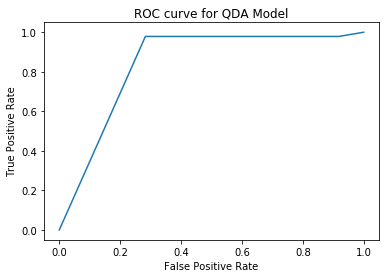

In [8]:
plt.plot(FalsePositive,TruePositive)
plt.title('ROC curve for QDA Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')